In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/audiology.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '500M')

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['history_noise','class'],['history_fluctuating','class']]
tempForbid = p.ForbiddenWithin(
    ['class','history_fluctuating','history_noise'])
temporal = [tempForbid]
prior = p.knowledge(forbiddirect = forbid, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

0* class history_fluctuating history_noise 

forbiddirect

history_noise ==> class 
history_fluctuating ==> class 
requiredirect


#### Load causal algorithms from the py-causal library and Run Bootstrapping FGES Discrete

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'bdeu')

samplePrior: Sample prior (min = 1.0) (java.lang.Double) [default:1.0]
structurePrior: Structure prior coefficient (min = 1.0) (java.lang.Double) [default:1.0]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]


In [6]:
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'bdeu', priorKnowledge = prior, dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True, 
           bootstrapSampleSize = 5, bootstrapEnsemble = 1)

#### Bootstrapping FGES Discrete's Result's Nodes

In [7]:
tetrad.getNodes()

[u'age_gt_60',
 u'air',
 u'airBoneGap',
 u'ar_c',
 u'ar_u',
 u'bone',
 u'boneAbnormal',
 u'bser',
 u'class',
 u'history_buzzing',
 u'history_dizziness',
 u'history_fluctuating',
 u'history_fullness',
 u'history_heredity',
 u'history_nausea',
 u'history_noise',
 u'history_recruitment',
 u'history_ringing',
 u'history_roaring',
 u'history_vomiting',
 u'indentifier',
 u'late_wave_poor',
 u'm_at_2k',
 u'm_cond_lt_1k',
 u'm_gt_1k',
 u'm_m_gt_2k',
 u'm_m_sn',
 u'm_m_sn_gt_1k',
 u'm_m_sn_gt_2k',
 u'm_m_sn_gt_500',
 u'm_p_sn_gt_2k',
 u'm_s_gt_500',
 u'm_s_sn',
 u'm_s_sn_gt_1k',
 u'm_s_sn_gt_2k',
 u'm_s_sn_gt_3k',
 u'm_s_sn_gt_4k',
 u'm_sn_2_3k',
 u'm_sn_gt_1k',
 u'm_sn_gt_2k',
 u'm_sn_gt_3k',
 u'm_sn_gt_4k',
 u'm_sn_gt_500',
 u'm_sn_gt_6k',
 u'm_sn_lt_1k',
 u'm_sn_lt_2k',
 u'm_sn_lt_3k',
 u'middle_wave_poor',
 u'mod_gt_4k',
 u'mod_mixed',
 u'mod_s_mixed',
 u'mod_s_sn_gt_500',
 u'mod_sn',
 u'mod_sn_gt_1k',
 u'mod_sn_gt_2k',
 u'mod_sn_gt_3k',
 u'mod_sn_gt_4k',
 u'mod_sn_gt_500',
 u'notch_4k',
 u

#### Bootstrapping FGES Discrete's Result's Nodes

In [8]:
tetrad.getEdges()

[u'history_roaring --- waveform_ItoV_prolonged [no edge]:0.4000[-->]:0.0000[<--]:0.2000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.4000',
 u'airBoneGap --- tymp [no edge]:0.0000[-->]:0.0000[<--]:0.4000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.6000',
 u'ar_c --- o_ar_c [no edge]:0.0000[-->]:0.0000[<--]:0.2000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.8000',
 u'class --- tymp [no edge]:0.0000[-->]:0.0000[<--]:0.4000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.6000',
 u'ar_c --- o_ar_u [no edge]:0.2000[-->]:0.2000[<--]:0.0000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.6000',
 u'history_heredity --- s_sn_gt_2k [no edge]:0.4000[-->]:0.0000[<--]:0.0000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.6000',
 u'history_recruitment --> m_sn_gt_1k [no edge]:0.2000[-->]:0.4000[<--]:0.0000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.4000',
 u'age_gt_60 --- class [no edge]:0.0000[-->]:0.2000[<--]:0.2000[o->]:0.0000[<-o]

#### Plot The Result's Graph

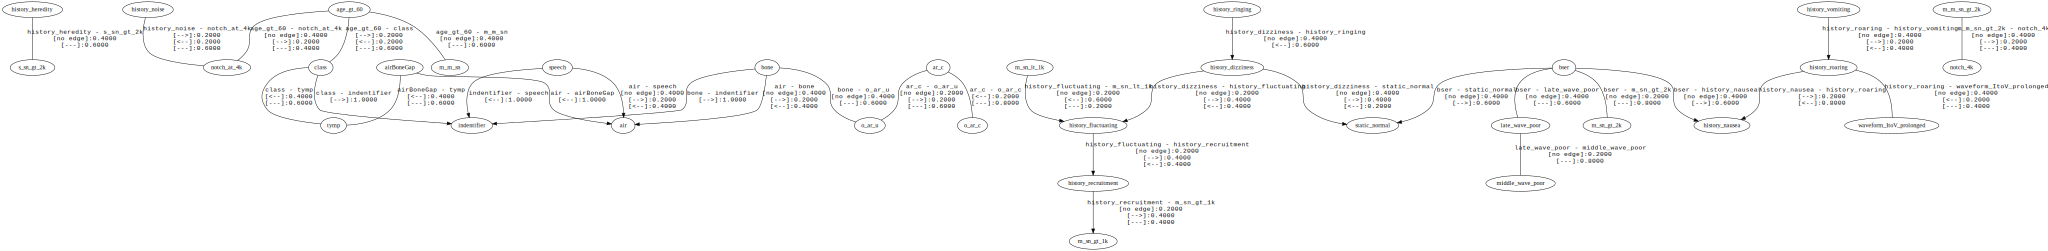

In [9]:
dot = tetrad.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [10]:
pc.stop_vm()